# Analyzing "House" dataset of "King County, USA" to <i>"Predict the Price of House"</i>

<b>Dataset has been downloaded from Kaggle and saved locally in same directory as:</b>

<i>house_data.csv</i>

# 1) Importing Dataset

In [1]:
# Importing pandas library to work on dataset
import pandas as pd

# Fetching the dataset into a dataframe
path = "house_data.csv"
df = pd.read_csv(path)

In [2]:
# Checking for dataset shape
df.shape

(21613, 21)

In [3]:
# Displaying first ten rows of dataset
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# 2) Data Wrangling

<i>Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.</i>

<p><b>Data Wrangling includes:</b></p>
<ul>
    <li> Identify and Handle Missing Values
    <li> Data Standardization
    <li> Data Normalization (Centering / Scaling)
    <li> Binning
    <li> Indicator Variable
</ul>

## a) Identify and Handle Missing Values

<b>How to work with missing data?</b>
<ol>
    <li>identify missing data</li>
    <li>correct data format</li>
    <li>deal with missing data</li>
</ol>

### I. IDENTIFYING MISSING VALUES

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### II. Correct data format
<p>Now we will check and make sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [5]:
# Checking for datatypes of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Dealing with outliers

We will be using Scatter Plots to detect outliers

In [6]:
# importing matplotlib to plot charts
import matplotlib.pyplot as plt

<b>i. Feature Variable : 'sqft_living'</b>

In [7]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

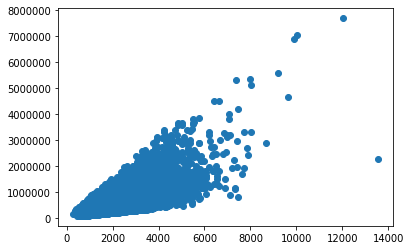

In [8]:
# Checking outliers for the feature variable 'sqft_living'
plt.scatter(df['sqft_living'], df['price'])

In [9]:
# Finding row index of outliers (i.e. with values > 8000)
index = df[df['sqft_living']>8000].index

# Removing outliers
df.drop(index, inplace=True)

In [10]:
df['sqft_living'].describe()

count    21604.000000
mean      2076.643816
std        903.976311
min        290.000000
25%       1421.500000
50%       1910.000000
75%       2550.000000
max       8000.000000
Name: sqft_living, dtype: float64

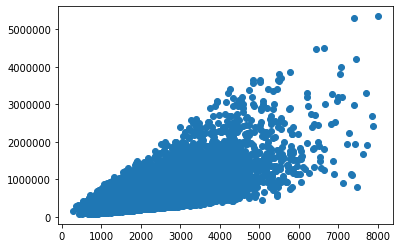

In [11]:
plt.scatter(df['sqft_living'], df['price'])

<b>ii. Feature Variable : 'sqft_lot'</b>

In [12]:
df['sqft_lot'].describe()

count    2.160400e+04
mean     1.508625e+04
std      4.137864e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.067550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

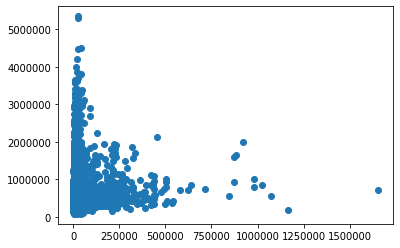

In [13]:
plt.scatter(df['sqft_lot'], df['price'])

In [14]:
# Finding row index of outliers (i.e. with values > 125000)
index = df[df['sqft_lot']>250000].index

# Removing outliers
df.drop(index, inplace=True)

In [15]:
df['sqft_lot'].describe()

count     21499.000000
mean      13046.335504
std       24425.937984
min         520.000000
25%        5036.500000
50%        7590.000000
75%       10575.500000
max      249126.000000
Name: sqft_lot, dtype: float64

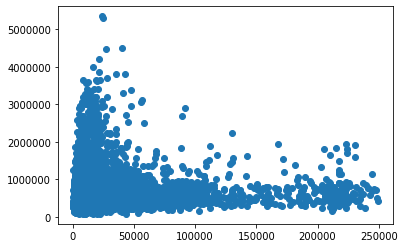

In [16]:
plt.scatter(df['sqft_lot'], df['price'])

## b) Binning
<p><i>Binning</i> is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.</p>

In [17]:
# Importing numpy to use 'linspace' method to create bins
import numpy as np

<b>i. Feature Variable : 'sqft_living'</b>

In [18]:
# Creating bin's range
bins = [int(x) for x in np.ndarray.tolist(np.linspace(0, 8000, 9))]
# Creating group_names(labels)
group_names = [int(x/1000) for x in bins if x < 8000]

# Setting bins
df['sqft_living_binned'] = pd.cut(df['sqft_living'], bins, labels=group_names)

df[['sqft_living','sqft_living_binned']].head()

,sqft_living,sqft_living_binned
0,1180,1
1,2570,2
2,770,0
3,1960,1
4,1680,1


<b>ii. Feature Variable : 'sqft_lot'</b>

In [19]:
# Creating bin's range
bins = [int(x) for x in np.ndarray.tolist(np.linspace(0, 250000, 26))]
# Creating group_names(labels)
group_names = [int(x/1000) for x in bins if x < 250000]

# Setting bins
df['sqft_lot_binned'] = pd.cut(df['sqft_lot'], bins, labels=group_names)

df[['sqft_lot','sqft_lot_binned']].head()

,sqft_lot,sqft_lot_binned
0,5650,0
1,7242,0
2,10000,0
3,5000,0
4,8080,0


<b>iii. Feature Variable : 'yr_built'</b>

In [20]:
# Creating bin's range
bins = [int(x) for x in np.ndarray.tolist(np.linspace(1900, 2020, 13))]
# Creating group_names(labels)
group_names = [x for x in range(0,12)]

# Setting bins
df['yr_built_binned'] = pd.cut(df['yr_built'], bins, labels=group_names, include_lowest=True)

df[['yr_built','yr_built_binned']].head()

,yr_built,yr_built_binned
0,1955,5
1,1951,5
2,1933,3
3,1965,6
4,1987,8


# 3) Exploratory Data Analysis (EDA)

<p><b>Exploratory Data Analysis (EDA)</b>, also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.</p>

‘Understanding the dataset’ can refer to a number of things including but not limited to…
>Extracting important variables and leaving behind useless variables

>Identifying outliers, missing values, or human error

>Understanding the relationship(s), or lack of, between variables

>Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

## a) Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.</p>



### Pearson Correlation
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b> : Total positive linear correlation.</li>
    <li><b>0</b> : No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b> : Total negative linear correlation.</li>
</ul>

<b>Pearson Correlation is the default method of the function "corr".</b>

### Correlation between Feature Variables

We can calculate the correlation between variables of type "int64" or "float64" using the method "corr"

In [21]:
correlation = df.corr()
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.017125,0.000946,0.006853,-0.009221,-0.148014,0.019217,-0.002568,0.015054,-0.024137,0.010285,-0.007535,-0.004898,0.022952,-0.016390,-0.011199,-0.005217,0.026934,-0.002030,-0.134990
price,-0.017125,1.000000,0.309136,0.517667,0.694162,0.101787,0.260509,0.257684,0.397922,0.041115,0.673294,0.597346,0.312632,0.053424,0.121002,-0.051205,0.318642,0.019220,0.594698,0.075995
bedrooms,0.000946,0.309136,1.000000,0.514767,0.579607,0.055263,0.174007,-0.009257,0.076269,0.028806,0.354888,0.477418,0.300798,0.154233,0.017347,-0.153237,-0.010251,0.130546,0.390637,0.036003
bathrooms,0.006853,0.517667,0.514767,1.000000,0.749736,0.098988,0.502224,0.058076,0.179273,-0.125042,0.661067,0.679287,0.274127,0.509076,0.047848,-0.204181,0.024235,0.223122,0.567264,0.077289
sqft_living,-0.009221,0.694162,0.579607,0.749736,1.000000,0.216400,0.355027,0.094820,0.275968,-0.057382,0.762476,0.873958,0.425366,0.320935,0.049858,-0.200143,0.052838,0.239905,0.761065,0.178127
sqft_lot,-0.148014,0.101787,0.055263,0.098988,0.216400,1.000000,-0.024143,0.032454,0.053827,-0.010782,0.143298,0.226934,0.021642,0.066908,0.010613,-0.158138,-0.079236,0.267282,0.216221,0.800343
floors,0.019217,0.260509,0.174007,0.502224,0.355027,-0.024143,1.000000,0.024111,0.027190,-0.264033,0.457955,0.526044,-0.250777,0.489673,0.006574,-0.058914,0.048992,0.125727,0.278999,-0.022799
waterfront,-0.002568,0.257684,-0.009257,0.058076,0.094820,0.032454,0.024111,1.000000,0.403360,0.017375,0.079152,0.066081,0.071597,-0.026392,0.089672,0.032074,-0.014911,-0.041071,0.084392,0.039783
view,0.015054,0.397922,0.076269,0.179273,0.275968,0.053827,0.027190,0.403360,1.000000,0.046262,0.247351,0.157959,0.272368,-0.055798,0.102614,0.089635,0.011543,-0.087202,0.277511,0.051192
condition,-0.024137,0.041115,0.028806,-0.125042,-0.057382,-0.010782,-0.264033,0.017375,0.046262,1.000000,-0.143900,-0.158254,0.176900,-0.361274,-0.060493,0.002806,-0.013284,-0.106128,-0.092477,0.001771


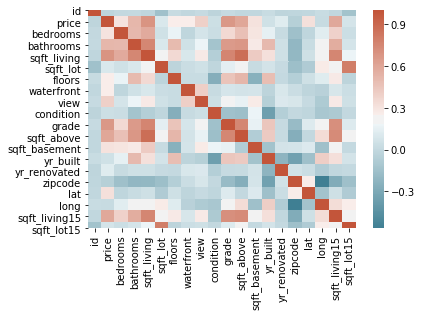

In [22]:
# seaborn is a visualizing package
# We will be using both seaborn and matplotlib for visualization
import seaborn as sns

# Plotting the heatmap
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

<i>The diagonal elements are always one</i>

<p>sometimes we would like to know the significant of the correlation estimate.</p>

### P-value
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [23]:
# Obtaining above information using  "stats" module in the "scipy"  library.
from scipy import stats

#### Bedrooms vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'bedrooms' and 'price'.

In [25]:
pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.30913645240290266 with a P-value of 0.0


#### Bathrooms vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'bathrooms' and 'price'.

In [26]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.5176671698489387 with a P-value of 0.0


#### Sqft_living vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_living' and 'price'.

In [75]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living_binned'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.6636606190443974 with a P-value of 0.0


#### Sqft_lot vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_lot' and 'price'.

In [76]:
pearson_coef, p_value = stats.pearsonr(df['sqft_lot_binned'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.10763430428745768 with a P-value of 2.0266247459155235e-56


#### Floors vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'floors' and 'price'.

In [29]:
pearson_coef, p_value = stats.pearsonr(df['floors'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.2605092949561793 with a P-value of 0.0


#### Waterfront vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'waterfront' and 'price'.

In [30]:
pearson_coef, p_value = stats.pearsonr(df['waterfront'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.25768378999289826 with a P-value of 4e-323


#### View vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'view' and 'price'.

In [31]:
pearson_coef, p_value = stats.pearsonr(df['view'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.397921708288015 with a P-value of 0.0


#### Condition vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'condition' and 'price'.

In [32]:
pearson_coef, p_value = stats.pearsonr(df['condition'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.04111499613095378 with a P-value of 1.632499552904055e-09


#### Grade vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'grade' and 'price'.

In [33]:
pearson_coef, p_value = stats.pearsonr(df['grade'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.6732944017228978 with a P-value of 0.0


#### Sqft_above vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_above' and 'price'.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.5973461982753441 with a P-value of 0.0


#### Sqft_basement vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_basement' and 'price'.

In [35]:
pearson_coef, p_value = stats.pearsonr(df['sqft_basement'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.31263159132515905 with a P-value of 0.0


#### Yr_built vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'yr_built' and 'price'.

In [77]:
pearson_coef, p_value = stats.pearsonr(df['yr_built_binned'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.054460229211715144 with a P-value of 1.3415594487886922e-15


#### Yr_renovated vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'yr_renovated' and 'price'.

In [37]:
pearson_coef, p_value = stats.pearsonr(df['yr_renovated'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.1210019040517839 with a P-value of 6.30627152508459e-71


#### Lat vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'lat' and 'price'.

In [38]:
pearson_coef, p_value = stats.pearsonr(df['lat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.31864248591043837 with a P-value of 0.0


#### Long vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'long' and 'price'.

In [39]:
pearson_coef, p_value = stats.pearsonr(df['long'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.01922008418849009 with a P-value of 0.004828642922779233


#### Sqft_living15 vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_living15' and 'price'.

In [41]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living15'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.5946983487611635 with a P-value of 0.0


#### Sqft_lot15 vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'sqft_lot15' and 'price'.

In [42]:
pearson_coef, p_value = stats.pearsonr(df['sqft_lot15'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.07599479739177237 with a P-value of 6.525975252158488e-29


#### zipcode vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'zipcode' and 'price'.

In [43]:
pearson_coef, p_value = stats.pearsonr(df['zipcode'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.051204704707398165 with a P-value of 5.805290332409149e-14


In [44]:
# dataframe with only feature variables
features = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","yr_built"]]

# dataframe with only target variable
target = df[["price"]]

# dataframe with both feature variables and target variable
df1 = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","yr_built","price"]]

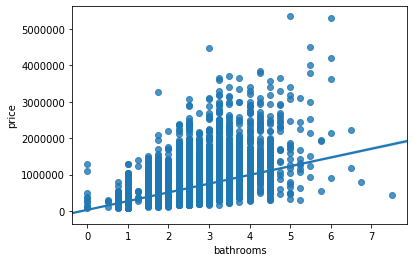

In [74]:
sns.regplot(x="bathrooms", y="price", data=df)